<b>ФИО:</b> <i>Cенчило П. В.</i>;
<br><b>ПА №:</b> `2` = <b>Блок</b> № `2`;
<br><b>Дата:</b> `2023-08-26`.

**Тема:** "KNN и Линейная регрессия"

**Задание 1. (30 %)**
<br>
<br>Сгенерировать случайным образом `3` набора данных (см. картинки).
<br>Количество точек в каждом - от `100` до `200`.
<br>Цветом обозначены метки классов.
<br>
<br>Для каждого набора данных:
<br>•  Разделить дата-сет на `train` / `test` (`80`/`20`);
<br>•  Обучить и протестировать `KNN`;
<br>•  Построить графики точности классификации (на `train` / `test` выборках) при разных `k = (1 .. 8)`;
<br>•  Пользуясь стандартными методами из `SciKit-Learn`, вычислить точность, полноту и `F1`-меру,
<br> построить матрицу расхождений.

In [1]:
from sklearn.datasets import make_circles, make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd

import numpy as np

In [2]:
import random
RS = 10
random.seed(RS)
print("RS =", random.random())

RS = 0.5714025946899135


In [3]:
n_Dots_min = 100 
n_Dots_max = 200
n_Dots = n_Dots_max
print("n_Dots =", n_Dots)
print()
n_Classes = 2
print("n_Classes =", n_Classes)

n_Dots = 200

n_Classes = 2


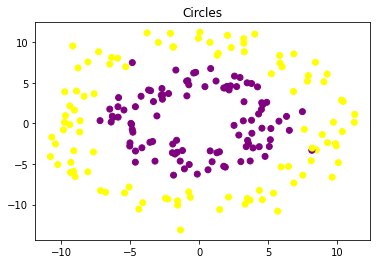

In [4]:
A_Dots_L, A_Labels_L = make_circles(n_samples = n_Dots, noise = 0.12, factor = 0.5, random_state = RS)
#print(A_Dots_L, len(A_Dots_L))
A_Dots_L *= 10
#print(A_Labels_L, len(A_Labels_L))

Colours_L = ['yellow' if (l == 0) else 'purple' for l in A_Labels_L]

plt.title("Circles")
plt.scatter(A_Dots_L[:, 0], A_Dots_L[:, 1], c = Colours_L, edgecolors = None)
plt.show()

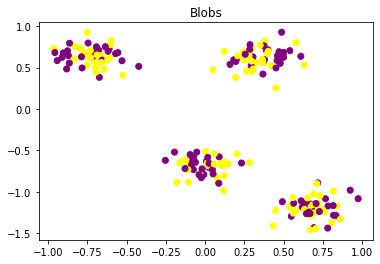

In [5]:
#
Colours_L = ['yellow' if (l == 0) else 'purple' for l in A_Labels_L]

Centers_L = 4
B0_Dots_L, B0_Labels_L = make_blobs(n_samples = n_Dots, n_features = 2, centers = Centers_L, cluster_std = 0.99, center_box = (-10.0, 10.0), shuffle = True, random_state = RS, return_centers = False)
B0_Dots_L /= 8 #
plt.title("Blobs")
plt.scatter(B0_Dots_L[:, 0], B0_Dots_L[:, 1], c = Colours_L, edgecolors = None)
plt.show()
#plt.clf()


	min 			 max
0.0207519493594015 	 0.771320643266746
0.6336482349262754 	 0.7488038825386119
		=> numb = 0.5


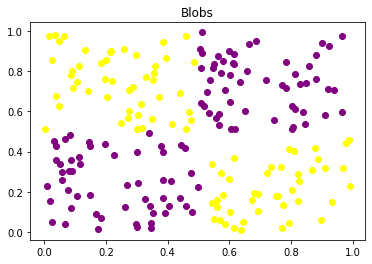

In [6]:
#
Colours_L = ['yellow', 'purple']

np.random.seed(RS)
B1_Dots_L = np.random.rand(n_Dots, 2)
#print("B1_Dots_L =\n", B1_Dots_L)
#print("len(B1_Dots_L) =", len(B1_Dots_L))
print('\n\tmin', '\t\t\t max')
print(min(B1_Dots_L[0]), '\t', max(B1_Dots_L[0]))
print(min(B1_Dots_L[1]), '\t', max(B1_Dots_L[1]))
numb = (1 - 0) / 2
print("\t\t=> numb =", numb)

B1_Labels_L = np.zeros(n_Dots, dtype = int) # = 0
#print(B1_Labels_L, len(B1_Labels_L))
B1_Labels_L[(B1_Dots_L[:, 0] <= numb) & (B1_Dots_L[:, 1] <= numb)] = 1
B1_Labels_L[(B1_Dots_L[:, 0] >= numb) & (B1_Dots_L[:, 1] >= numb)] = 1
#print(B1_Labels_L, len(B1_Labels_L))

plt.title("Blobs")
plt.scatter(B1_Dots_L[B1_Labels_L == 0][:, 0], B1_Dots_L[B1_Labels_L == 0][:, 1], color = Colours_L[0], edgecolors = None)
plt.scatter(B1_Dots_L[B1_Labels_L == 1][:, 0], B1_Dots_L[B1_Labels_L == 1][:, 1], color = Colours_L[1], edgecolors = None)
plt.show()

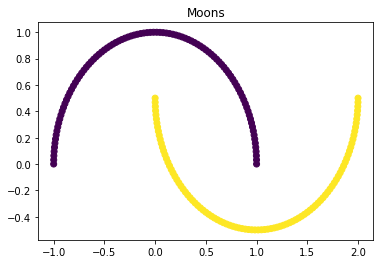

In [7]:
C_Dots_L, C_Labels_L = make_moons(n_samples = n_Dots, shuffle = True, noise = 0, random_state = RS)

plt.title("Moons")
plt.scatter(C_Dots_L[:, 0], C_Dots_L[:, 1], c = C_Labels_L)
plt.show()

In [8]:
def split_DS_0(Dots_L, Labels_L):
    n_Dots = len(Dots_L) # Labels_L
    DS_size_train = 0.8
    Dots_L_train, Dots_L_test, Labels_L_train, Labels_L_test = train_test_split(Dots_L, Labels_L, train_size = DS_size_train, random_state = RS, shuffle = True)
    #
    #Dots_L_train = Dots_L_train.reshape(-1, 1)
    #Dots_L_test = Dots_L_test.reshape(-1, 1)    
    
    std_Scaler = StandardScaler() #
    std_Scaler.fit(Dots_L_train)  #
    #
    Dots_L_train = std_Scaler.transform(Dots_L_train) # Scaled Features
    Dots_L_test  = std_Scaler.transform(Dots_L_test)  # Scaled Features 
    print("\nn_Dots =", n_Dots) # = 200
    print("- 80 % (n_Dots) =" , int(n_Dots * 0.8)) # = 160
    print("- 20 % (n_Dots) = ", int(n_Dots * 0.2)) # =  40

    print("Shapes of:")
    print("- [Dots_L_train]:" , Dots_L_train.shape)
    print("- [Dots_L_test ]: ", Dots_L_test.shape)
    #
    return Dots_L_train, Dots_L_test, Labels_L_train, Labels_L_test

print("DS:")
print("\n- Circles:")
A_Dots_L_train, A_Dots_L_test, A_Labels_L_train, A_Labels_L_test = split_DS_0(A_Dots_L, A_Labels_L)
print("\n- Blobs:")
B1_Dots_L_train, B1_Dots_L_test, B1_Labels_L_train, B1_Labels_L_test = split_DS_0(B1_Dots_L, B1_Labels_L)
print("\n- Moons:")
C_Dots_L_train, C_Dots_L_test, C_Labels_L_train, C_Labels_L_test = split_DS_0(C_Dots_L, C_Labels_L)

print()
#print(C_Dots_L_test)

DS:

- Circles:

n_Dots = 200
- 80 % (n_Dots) = 160
- 20 % (n_Dots) =  40
Shapes of:
- [Dots_L_train]: (160, 2)
- [Dots_L_test ]:  (40, 2)

- Blobs:

n_Dots = 200
- 80 % (n_Dots) = 160
- 20 % (n_Dots) =  40
Shapes of:
- [Dots_L_train]: (160, 2)
- [Dots_L_test ]:  (40, 2)

- Moons:

n_Dots = 200
- 80 % (n_Dots) = 160
- 20 % (n_Dots) =  40
Shapes of:
- [Dots_L_train]: (160, 2)
- [Dots_L_test ]:  (40, 2)



In [9]:
def DS_to_DF(Dots_L_train, Dots_L_test):
    DF_train = pd.DataFrame(Dots_L_train)
    print("DF_train =\n", DF_train, '\n')
    DF_test = pd.DataFrame(Dots_L_test)
    print("DF_test  =\n", DF_test, '\n')
    return DF_train, DF_test

print("DS:\n")
print("\n- Circles:\n")
A_DF_train, A_DF_test = DS_to_DF(A_Dots_L_train, A_Dots_L_test)
print("\n- Blobs:\n")
B1_DF_train, B1_DF_test = DS_to_DF(B1_Dots_L_train, B1_Dots_L_test)
print("\n- Moons:\n")
C_DF_train, C_DF_test = DS_to_DF(C_Dots_L_train, C_Dots_L_test)

DS:


- Circles:

DF_train =
             0         1
0    1.400097  0.901158
1   -1.773984 -0.421244
2   -0.601070  0.715159
3   -1.535574  0.291647
4    1.711011 -1.121247
..        ...       ...
155 -0.248077 -0.343821
156  0.792625 -0.479550
157 -1.585557 -1.020296
158 -0.007872  1.088096
159  1.726902  0.036092

[160 rows x 2 columns] 

DF_test  =
            0         1
0  -1.468247 -0.168903
1   0.736191  1.893442
2  -0.838435 -0.465198
3  -0.118913  0.591580
4   1.136489  0.159273
5   0.657483 -0.410863
6  -1.142646 -1.438114
7  -1.580225 -0.808172
8  -0.674652 -1.659268
9   0.596853  1.797826
10 -0.986999  0.362906
11  1.762126 -0.461986
12 -0.815001 -0.007345
13 -0.575751  0.701276
14  1.607034  0.889119
15 -0.203091 -0.782463
16 -1.657195  0.677454
17  0.387862  0.792616
18 -0.122176  0.901833
19  0.248449  0.904342
20 -0.807258 -0.114265
21 -1.090439  1.259367
22  0.887407  0.456071
23  0.824388  0.447058
24  0.535597 -0.234356
25  1.041176  0.058314
26  1.849916  0.474479


In [10]:
# sklearn.neighbors.KNeighborsClassifier
# score(X, y[, sample_weight])
# Return the mean accuracy on the given test data and labels.

def teach_kNN_Model(Dots_L_train, Labels_L_train, Dots_L_test, Labels_L_test):
    kNN_min = 1
    kNN_max = 8 + 1
    kNN_L = np.arange(start = kNN_min, stop = kNN_max, step = 1, dtype = int)
    print("\t       k ∈", kNN_L)
    n_k = len(kNN_L) # = 8
    Scores_L_train = [0] * n_k
    Scores_L_test  = [0] * n_k
    for i in range(0, n_k):
        k = i + 1
        print("\nk = ", k)
        
        kNN_Model = KNeighborsClassifier(n_neighbors = k)
        kNN_Model.fit(Dots_L_train, Labels_L_train) # =
        
        kNN_Predictions = kNN_Model.predict(Dots_L_test)
        print("\nkNN_Predictions =\n", kNN_Predictions) # = 0 | 1
        
        Scores_L_train[i - 1] = kNN_Model.score(Dots_L_train, Labels_L_train) # accuracy_score
        Scores_L_test[i - 1]  = kNN_Model.score(Dots_L_test, Labels_L_test)   # accuracy_score
    
    print("\nAccuracy:")
    print("- [Scores_L_train] =", Scores_L_train)
    print("- [Scores_L_test ] =", Scores_L_test)
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(Labels_L_test, kNN_Predictions))
    print("\nClassification Report:\n")
    print(classification_report(Labels_L_test, kNN_Predictions))    

    return Scores_L_train, Scores_L_test

print("DS:\n")
print("\n- Circles:")
A_Scores_L_train, A_Scores_L_test = teach_kNN_Model(A_Dots_L_train, A_Labels_L_train, A_Dots_L_test, A_Labels_L_test)
print("\n- Blobs:")
B1_Scores_L_train, B1_Scores_L_test = teach_kNN_Model(B1_Dots_L_train, B1_Labels_L_train, B1_Dots_L_test, B1_Labels_L_test)
print("\n- Moons:")
C_Scores_L_train, C_Scores_L_test = teach_kNN_Model(C_Dots_L_train, C_Labels_L_train, C_Dots_L_test, C_Labels_L_test)

DS:


- Circles:
	       k ∈ [1 2 3 4 5 6 7 8]

k =  1

kNN_Predictions =
 [0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1
 1 1 1]

k =  2

kNN_Predictions =
 [0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1
 1 1 1]

k =  3

kNN_Predictions =
 [0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1
 1 1 1]

k =  4

kNN_Predictions =
 [0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1
 1 1 1]

k =  5

kNN_Predictions =
 [0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1
 1 1 1]

k =  6

kNN_Predictions =
 [0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1
 1 1 1]

k =  7

kNN_Predictions =
 [0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1
 1 1 1]

k =  8

kNN_Predictions =
 [0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1
 1 1 1]

Accuracy:
- [Scores_L_train] = [0.98125, 0.98125, 0.98125, 0.975

Графики Точности Классификации:

- Circles:


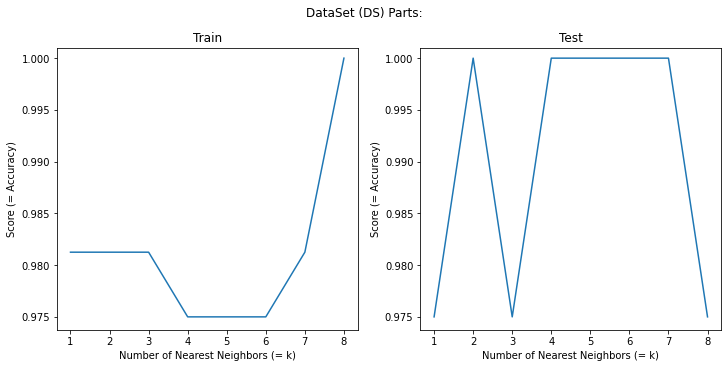

- Blobs:


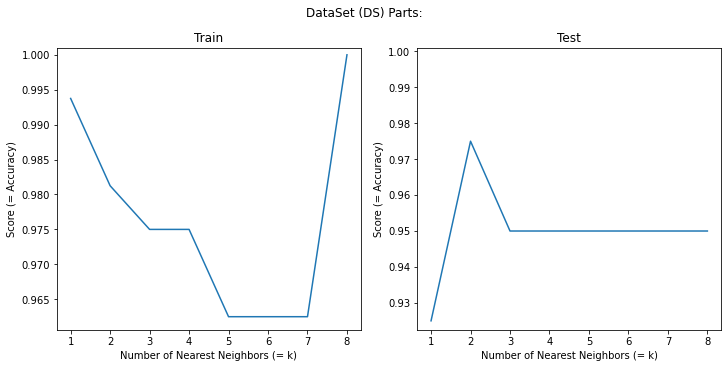

- Moons:


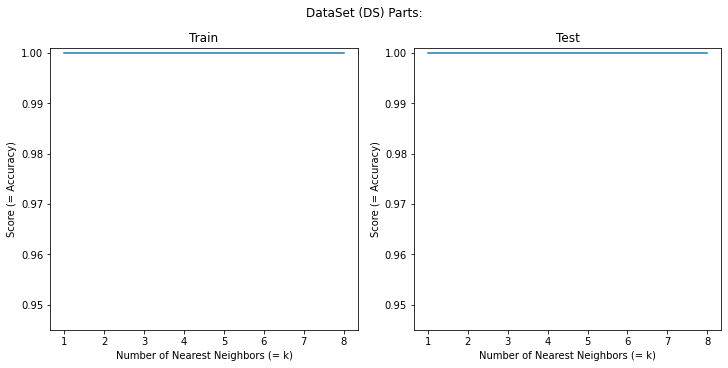

In [11]:
def plot_kNN_Scores(Scores_L_train, Scores_L_test):
    k_NN_min = 1
    k_NN_max = 8
    k_NN_int = [0] * k_NN_max
    k_NN_str = [0] * k_NN_max
    for k in range (k_NN_max):
        k_NN_int[k] = k
        k_NN_str[k] = str(k + 1)
    #print(k_NN_int, '=', k_NN_str)
    
    fig, axs = plt.subplots(1, 2, figsize = (10, 5), constrained_layout = True)
    #plt.tight_layout(4)
    
    plt.suptitle("DataSet (DS) Parts:")
    
    axs[0].set_title("Train")
    axs[0].plot(Scores_L_train)
    
    axs[1].set_title("Test")
    axs[1].plot(Scores_L_test)
        
    for i in range(2):
        axs[i].set_xticks(k_NN_int) #
        axs[i].set_xticklabels(k_NN_str) #
        #axs[i].xaxis.set_ticks(k_NN_int) #
        #axs[i].xaxis.set_ticklabels(k_NN_str) #
        
        axs[i].set_xlabel("Number of Nearest Neighbors (= k)")
        axs[i].set_ylabel("Score (= Accuracy)")
        axs[i].set_ylim(top = 1.001)
    
    plt.show()    

print("Графики Точности Классификации:\n")

print("- Circles:")
plot_kNN_Scores(A_Scores_L_train, A_Scores_L_test)

print("- Blobs:")
plot_kNN_Scores(B1_Scores_L_train, B1_Scores_L_test)

print("- Moons:")
plot_kNN_Scores(C_Scores_L_train, C_Scores_L_test)

___

**Задание 2. (20 %)<br>
Метрики**
<br>
<br>`25` объектов классифицированы на `3` класса:
```
C = "Cat" 
F = "Fish"
H = "Hen"

# Истинные значения:
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]

# Результат системы:
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]
```
Написать код на `Python`, который воспроизводит вывод, представленный ниже 
<br> (не используя сторонние библиотеки, кроме `NumPy`):
<br> 
```
[[4 1 1]
 [6 2 2]
 [3 0 6]]
 
              precision recall f1-score support
              
          Cat     0.308  0.667    0.421       6
         Fish     0.667  0.200    0.308      10
          Hen     0.667  0.667    0.667       9
 
     accuracy                     0.480      25
    macro avg     0.547  0.511    0.465      25
 weighted avg     0.581  0.480    0.464      25
 
 ```
 

In [1]:
import numpy as np
#from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, precision_score, recall_score, classification_report

In [13]:
def cmp_Y(A, B):
    print("\nTypes of:")
    type_A = type(A)
    print("- A =", type_A)
    type_B = type(B)
    print("- B =", type_B)
    
    if (type_A != type_B):
        print("=> Error: The 2 Arrays have different Types.")
    elif(type_A == type_B):
        print("=> OK: The 2 Arrays have the same Types.")
        
        if (type_A != np.ndarray):
            print("\n =>Error: Non-Proper Types of Parameters. (Not `numpy.ndarray`)") 
        else:
            
            print("\nLengths of:")
            len_A = len(A)
            print("- A =", len_A)
            len_B = len(B)
            print("- B =", len_B)  
            print("Shape:", A.shape)
            
            if (len_A != len_B):
                print("=> Error: The 2 Arrays have different Lengths.")
            else:
                print("=> OK: The 2 Arrays have the same Lengths.")
            
                print("\n- Результат работы системы распознавания полностью совпадает с Истинными Значениями?")
                #if (A == B).all():
                if (np.array_equiv(A, B)):
                    yy = True
                else:
                    yy = False
                print("-", yy)
                
                YY_TF_L = np.zeros(shape = len_A, dtype = bool)
                #print("YY_TF_L =\n", YY_TF_L)
                for i in range(len_A):
                    YY_TF_L[i] = (A[i] == B[i])
                print("YY_TF_L =\n", YY_TF_L)
                return YY_TF_L

In [14]:
C = "Cat" 
F = "Fish"
H = "Hen"
Classes_L = [C, F, H]
print("Классы объектов:")
print(" Classes_L =", Classes_L)

# Истинные значения:
NP_y_true = np.array([C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]) # y_real
print("\nИстинные значения:", "\n NP_y_true =\n", NP_y_true)

# Результат системы:
NP_y_pred = np.array([C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H])
print("\nРезультат предсказания:", "\n NP_y_pred =\n", NP_y_pred)

Y_TF_L = cmp_Y(NP_y_true, NP_y_pred)

Классы объектов:
 Classes_L = ['Cat', 'Fish', 'Hen']

Истинные значения: 
 NP_y_true =
 ['Cat' 'Cat' 'Cat' 'Cat' 'Cat' 'Cat' 'Fish' 'Fish' 'Fish' 'Fish' 'Fish'
 'Fish' 'Fish' 'Fish' 'Fish' 'Fish' 'Hen' 'Hen' 'Hen' 'Hen' 'Hen' 'Hen'
 'Hen' 'Hen' 'Hen']

Результат предсказания: 
 NP_y_pred =
 ['Cat' 'Cat' 'Cat' 'Cat' 'Hen' 'Fish' 'Cat' 'Cat' 'Cat' 'Cat' 'Cat' 'Cat'
 'Hen' 'Hen' 'Fish' 'Fish' 'Cat' 'Cat' 'Cat' 'Hen' 'Hen' 'Hen' 'Hen' 'Hen'
 'Hen']

Types of:
- A = <class 'numpy.ndarray'>
- B = <class 'numpy.ndarray'>
=> OK: The 2 Arrays have the same Types.

Lengths of:
- A = 25
- B = 25
Shape: (25,)
=> OK: The 2 Arrays have the same Lengths.

- Результат работы системы распознавания полностью совпадает с Истинными Значениями?
- False
YY_TF_L =
 [ True  True  True  True False False False False False False False False
 False False  True  True False False False  True  True  True  True  True
  True]


In [15]:
# + Проверка unique в B ?

n_uni_y_real = np.unique(NP_y_true, return_index = True, return_counts = True) # sorted(_L)
print("n_uni_y_real =\n", n_uni_y_real)

#n_uni_y_pred = np.unique(NP_y_pred, return_index = True, return_counts = True)
#print("n_uni_y_pred =\n", n_uni_y_pred)

n_Classes = len(n_uni_y_real[0])
print("\nTotal Number of Unique Classes:", n_Classes)

Classes_L_I = [0] * (len(Classes_L) + 1)
len_Classes_L_I = len(Classes_L_I)
for i in range (len_Classes_L_I - 1):
    Classes_L_I[i] = n_uni_y_real[1][i]
Classes_L_I[len_Classes_L_I - 1] = len(NP_y_true) # - 1
print("\nClasses_L_I =", Classes_L_I)

n_uni_y_real =
 (array(['Cat', 'Fish', 'Hen'], dtype='<U4'), array([ 0,  6, 16], dtype=int64), array([ 6, 10,  9], dtype=int64))

Total Number of Unique Classes: 3

Classes_L_I = [0, 6, 16, 25]


In [16]:
y_true_3_L = [[]] * n_Classes
print("\ny_true_3_L =\n", y_true_3_L)
print("\nType of [y_true_3_L]:", type(y_true_3_L))

for i in range(n_Classes): # = 0, 1, 2
    y_true_3_L[i] = NP_y_true[Classes_L_I[i]:Classes_L_I[i + 1]] # = [0, 6], [6, 16), [16, 25)   
print("\ny_true_3_L =\n", y_true_3_L)  
print("\nType of [y_true_3_L]:", type(y_true_3_L))


y_true_3_L =
 [[], [], []]

Type of [y_true_3_L]: <class 'list'>

y_true_3_L =
 [array(['Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat'], dtype='<U4'), array(['Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish',
       'Fish', 'Fish'], dtype='<U4'), array(['Hen', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen'],
      dtype='<U4')]

Type of [y_true_3_L]: <class 'list'>


In [17]:
y_pred_3_L = [[]] * n_Classes
print("\ny_pred_3_L =\n", y_pred_3_L)
print("\nType of [y_pred_3_L]:", type(y_pred_3_L))

for i in range(n_Classes): # = 0, 1, 2
    y_pred_3_L[i] = NP_y_pred[Classes_L_I[i]:Classes_L_I[i + 1]] # = [0, 6], [6, 16), [16, 25)   
print("\ny_pred_3_L =\n", y_pred_3_L)  
print("\nType of [y_pred_3_L]:", type(y_pred_3_L))


y_pred_3_L =
 [[], [], []]

Type of [y_pred_3_L]: <class 'list'>

y_pred_3_L =
 [array(['Cat', 'Cat', 'Cat', 'Cat', 'Hen', 'Fish'], dtype='<U4'), array(['Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Hen', 'Hen', 'Fish',
       'Fish'], dtype='<U4'), array(['Cat', 'Cat', 'Cat', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen'],
      dtype='<U4')]

Type of [y_pred_3_L]: <class 'list'>


In [18]:
# 1) 
print("\ny_true_3_L =\n") 
y_true_3_L


y_true_3_L =



[array(['Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat'], dtype='<U4'),
 array(['Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish',
        'Fish', 'Fish'], dtype='<U4'),
 array(['Hen', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen', 'Hen'],
       dtype='<U4')]

Классификатор определил (из `25` объектов):
<br>
<br>
• `Cat`: `13` раз, из которых верно – `4`:

=> `True Cat` $= 4$, `False Cat` $= (13 - 4) = 9$;
        
• `Fish`: `3` раза, из которых верно – `2`:

=> `True Fish` $= 2$, `False Fish` $= (3 - 2) = 1$;
        
• `Hen`: `9` раз, из которых верно – `6`:

=> `True Hen` $= 6$, `False Hen` $= (9 - 6) = 3$.  
<br>

=> `All` $= 6 + 10 + 9 = 25$        

=> `Positive` $= 4 + 2 + 6 = 12$

=> `Negative` $= 9 + 1 + 3 = 13$ или $= 25 - 12 = 13$

In [19]:
#
# 1) 
#def calc_TF_D(n_uni_y_real, n_Classes, Classes_L, y_true_3_L, y_pred_3_L):
#

#calc_TF_D(n_uni_y_real, n_Classes, Classes_L, y_true_3_L, y_pred_3_L)    

In [20]:
#
# 1) 
def calc_Confusion_M(y_true, y_pred):
    Class_L = np.unique(y_true, return_index = False, return_counts = False) #
    print("[Class_L] =", Class_L)
    print()
    
    n_Classes = len(Class_L)
    
    Conf_M = np.zeros(shape = (n_Classes, n_Classes), dtype = int)
    
    for i in range(n_Classes):
        for j in range(n_Classes):    
            Conf_M[i, j] = np.sum((y_true == Class_L[i]) & (y_pred == Class_L[j])) #
    
    print("[[Conf_M]] =")
    print(Conf_M)
    return Conf_M

Conf_M = calc_Confusion_M(NP_y_true, NP_y_pred)

[Class_L] = ['Cat' 'Fish' 'Hen']

[[Conf_M]] =
[[4 1 1]
 [6 2 2]
 [3 0 6]]


In [21]:
# 1) 
def calc_Metrics(Conf_M):
    n_Classes = len(Conf_M)
    print("n_Classes =", n_Classes)
    
    sum_i = [0] * n_Classes
    sum_j = [0] * n_Classes
    
    T = [0] * n_Classes
    
    A = 0
    P = [0] * n_Classes
    R = [0] * n_Classes
    F1 = [0] * n_Classes
    
    for i in range(n_Classes): # = rows  
        for j in range(n_Classes): # = cols
            sum_i[i] += Conf_M[i][j]
            sum_j[i] += Conf_M[j][i]
          
            if (i == j):
                T[i] = Conf_M[i][j]
                A += Conf_M[i][j]
            
    print("sum_i =", sum_i)
    print("sum_j =", sum_j) 
    
    n_All = sum(sum_i)
    print("n_All =", n_All)
    
    print("T =", T) # [True]
    
    A /= n_All #
    print("A =", A)
    
    for i in range(n_Classes):
        P[i] = T[i] / sum_j[i]
        R[i] = T[i] / sum_i[i] 
        
    for i in range(n_Classes):
        F1[i] = 2 * (R[i] * P[i]) / (R[i] + P[i])
    
    n_Metrics = 3 # = P, R, F1
    
    avg_Macro = [0] * n_Metrics
    avg_Weighted = [0] * n_Metrics
    
    w_L = [0] * n_Metrics
    avg_Macro[0] =  sum(P) / n_Classes
    avg_Macro[1] =  sum(R) / n_Classes
    avg_Macro[2] =  sum(F1) / n_Classes
    
    for i in range(n_Classes):
        w_L[i] = sum_i[i] / n_All
    print("w_L =", w_L)
    
    for i in range(n_Classes):
        avg_Weighted[0] += (P[i] * w_L[i])
        avg_Weighted[1] += (R[i] * w_L[i])
        avg_Weighted[2] += (F1[i] * w_L[i])
        
    print("P =", P)
    print("R =", R)
    print("F1 =", F1) 
    print("avg_Macro =", avg_Macro)
    print("avg_Weighted =", avg_Weighted)
        
    return A, P, R, F1, avg_Macro, avg_Weighted, sum_i, n_All
    
A, P, R, F1, avg_Macro, avg_Weighted, S, n_All = calc_Metrics(Conf_M)    

n_Classes = 3
sum_i = [6, 10, 9]
sum_j = [13, 3, 9]
n_All = 25
T = [4, 2, 6]
A = 0.48
w_L = [0.24, 0.4, 0.36]
P = [0.3076923076923077, 0.6666666666666666, 0.6666666666666666]
R = [0.6666666666666666, 0.2, 0.6666666666666666]
F1 = [0.42105263157894735, 0.30769230769230765, 0.6666666666666666]
avg_Macro = [0.547008547008547, 0.5111111111111111, 0.46513720197930725]
avg_Weighted = [0.5805128205128205, 0.48, 0.4641295546558704]


In [22]:
# 1) 

print("Total of Objects:")
n_Cat = n_uni_y_real[2][0]
print("- [Cat] : ", n_Cat)
n_Fish = n_uni_y_real[2][1]
print("- [Fish]:",  n_Fish)
n_Hen = n_uni_y_real[2][2]
print("- [Hen] : ", n_Hen)
n_CFH = n_Cat + n_Fish + n_Hen
print("=> All  :",  n_CFH)
print()

Total of Objects:
- [Cat] :  6
- [Fish]: 10
- [Hen] :  9
=> All  : 25



In [23]:
print("Classes_L =", Classes_L)

Metrics_L = ["Precision", "Recall", "F1-Score"]
print("Metrics_L =", Metrics_L)

Support = "Support" # The `Support` is the number of occurrences of each class in `y_true`.
print("Support =", Support)

# The `Macro avg` row averages the unweighted mean per label,
#  while the ‘Weighted avg’ row averages the support-weighted mean per label.
# `Accuracy` is the ratio of True predictions to total predictions.
Avg_L = ["Accuracy", "Macro Avg", "Weighted Avg"]
print("Avg_L =", Avg_L)

Classes_L = ['Cat', 'Fish', 'Hen']
Metrics_L = ['Precision', 'Recall', 'F1-Score']
Support = Support
Avg_L = ['Accuracy', 'Macro Avg', 'Weighted Avg']


In [24]:
# 0) SciKitLearn

# <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

#print("Confusion Matrix:")
#print(confusion_matrix(NP_y_true, NP_y_pred))

In [25]:
# 0.a) SciKitLearn

# <function sklearn.metrics._classification.precision_recall_fscore_support(y_true, y_pred, *, beta=1.0, labels=None, pos_label=1, average=None, warn_for=('precision', 'recall', 'f-score'), sample_weight=None, zero_division='warn')>

#SKL_PRFS = precision_recall_fscore_support(NP_y_true, NP_y_pred, average = None, labels = Classes_L)
#print("SKL_PRFS =")
#SKL_PRFS

In [26]:
# 0.a) SciKitLearn

#SKL_avg_Macro = precision_recall_fscore_support(NP_y_true, NP_y_pred, average = 'macro', labels = Classes_L)
#print("SKL_avg_Macro =", SKL_avg_Macro)
#print()
#SKL_avg_Weighted = precision_recall_fscore_support(NP_y_true, NP_y_pred, average = 'weighted', labels = Classes_L)
#print("SKL_avg_Weighted =", SKL_avg_Weighted)

In [27]:
# 0.a) SciKitLearn

# <function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

#SKL_A = accuracy_score(NP_y_true, NP_y_pred)
#print("\nAccuracy:", SKL_A)

#SKL_s_S = 0
#for i in range (n_Classes):
#    SKL_s_S += SKL_PRFS[3][i]
#print("\nNumber of Objects:", SKL_s_S)

In [28]:
# 0.a) SciKitLearn

#txt1 = ''
#txt2 = '\t                      ' #

#print('\t\t' + Metrics_L[0] + '\t' + Metrics_L[1] + '\t' + Metrics_L[2] + '\t' + Support)
#print()
#print(f"{Classes_L[0]:>12}", f"\t{SKL_PRFS[0][0]:>9.3f}", f"\t{SKL_PRFS[1][0]:>6.3f}", f"\t{SKL_PRFS[2][0]:>8.3f}", "\t{0:>7.0f}".format(SKL_PRFS[3][0]))
#print(f"{Classes_L[1]:>12}", f"\t{SKL_PRFS[0][1]:>9.3f}", f"\t{SKL_PRFS[1][1]:>6.3f}", f"\t{SKL_PRFS[2][1]:>8.3f}", "\t{0:>7.0f}".format(SKL_PRFS[3][1]))
#print(f"{Classes_L[2]:>12}", f"\t{SKL_PRFS[0][2]:>9.3f}", f"\t{SKL_PRFS[1][2]:>6.3f}", f"\t{SKL_PRFS[2][2]:>8.3f}", "\t{0:>7.0f}".format(SKL_PRFS[3][2]))
#print() #
#print(f"{Avg_L[0]:>12}", txt1, txt2, f"{SKL_A:>9.3f}", "\t{0:>7.0f}".format(SKL_s_S))
#print(f"{Avg_L[1]:>12}", f"   {SKL_avg_Macro[0]:>9.3f}", f"   {SKL_avg_Macro[1]:>9.3f}", f"{SKL_avg_Macro[2]:>9.3f}", "\t{0:>7.0f}".format(SKL_s_S))
#print(f"{Avg_L[2]:>12}", f"\t{SKL_avg_Weighted[0]:>9.3f}", f"   {SKL_avg_Weighted[1]:>9.3f}", f"{SKL_avg_Weighted[2]:>9.3f}", "\t{0:>7.0f}".format(SKL_s_S))

In [29]:
# 0.b) SciKitLearn

# <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

#print("Classification Report:\n")
#print(classification_report(NP_y_true, NP_y_pred, target_names = Classes_L, digits = 3))

**Metrics**:
- **Precision**: 
 - `Cat` : $P_{Cat} = \frac{T_{Cat}}{(T_{Cat} + F_{Cat})}$
 - `Fish`: $P_{Fish} = \frac{T_{Fish}}{(T_{Fish} + F_{Fish})}$
 - `Hen` : $P_{Hen} = \frac{T_{Hen}}{(T_{Hen} + F_{Hen})}$
- **Recall**:
 - `Cat` : $R_{Cat} = \frac{T_{Cat}}{(T_{Cat} + F_{Fish} + F_{Hen})}$
 - `Fish`: $R_{Fish} = \frac{T_{Fish}}{(T_{Fish} + F_{Cat} + F_{Hen})}$
 - `Hen` : $R_{Hen} = \frac{T_{Hen}}{(T_{Hen} + F_{Cat} + F_{Fish})}$
- **F1-Score**: #
 - `Cat` : $F_{1.Cat} = 2 \cdot \frac{(R_{Cat} \cdot P_{Cat})}{(R_{Cat} + P_{Cat})}$
 - `Fish`: $F_{1.Fish} = 2 \cdot \frac{(R_{Fish} \cdot P_{Fish})}{(R_{Fish} + P_{Fish})}$
 - `Hen` : $F_{1.Hen} =2 \cdot \frac{(R_{Hen} \cdot P_{Hen})}{(R_{Hen} + P_{Hen})}$
- **Support**:
 - `Cat` : $n_{Cat}$
 - `Fish`: $n_{Fish}$
 - `Hen` : $n_{Hen}$
 - `All` : $n_{All}$
- **Accuracy**: $A = \frac{(T_{Cat} + T_{Fish} + T_{Hen})}{n_{All}}$
- **Macro Average**:
 - `Precision`: $\frac{(P_{Cat} + P_{Fish} + P_{Hen})}{n_{Classes}}$
 - `Recall`: $\frac{(R_{Cat} + R_{Fish} + R_{Hen})}{n_{Classes}}$
 - `F1-Score`: $\frac{(F1_{Cat} + F1_{Fish} + F1_{Hen})}{n_{Classes}}$
- **Weighted Average**: `# (w = Weight)`
 - `Precision`: $((P_{Cat} \cdot w_{Cat}) + (P_{Fish} \cdot w_{Fish}) + (P_{Hen} \cdot w_{Hen}))$
 - `Recall`: $((R_{Cat} \cdot w_{Cat}) + (R_{Fish} \cdot w_{Fish}) + (R_{Hen} \cdot w_{Hen}))$
 - `F1-Score`: $((F1_{Cat} \cdot w_{Cat}) + (F1_{Fish} \cdot w_{Fish}) + (F1_{Hen} \cdot w_{Hen}))$

In [30]:
# 1) 

txt1 = ''
txt2 = '\t                      ' #

print("Confusion Matrix:")
print(Conf_M)
print()

print('\t\t' + Metrics_L[0] + '\t' + Metrics_L[1] + '\t' + Metrics_L[2] + '\t' + Support)
print()
print(f"{Classes_L[0]:>12}", f"\t{P[0]:>9.3f}", f"\t{R[0]:>6.3f}", f"\t{F1[0]:>8.3f}", "\t{0:>7.0f}".format(S[0]))
print(f"{Classes_L[1]:>12}", f"\t{P[1]:>9.3f}", f"\t{R[1]:>6.3f}", f"\t{F1[1]:>8.3f}", "\t{0:>7.0f}".format(S[1]))
print(f"{Classes_L[2]:>12}", f"\t{P[2]:>9.3f}", f"\t{R[2]:>6.3f}", f"\t{F1[2]:>8.3f}", "\t{0:>7.0f}".format(S[2]))
print()
print(f"{Avg_L[0]:>12}", txt1, txt2, f"\t{A:>8.3f}", "\t{0:>7.0f}".format(n_All))
print(f"{Avg_L[1]:>12}", f"    {avg_Macro[0]:>8.3f}", f"    {avg_Macro[1]:>8.3f}", f"\t{avg_Macro[2]:>8.3f}", "\t{0:>7.0f}".format(n_All))
print(f"{Avg_L[2]:>12}", f"    {avg_Weighted[0]:>8.3f}", f"    {avg_Weighted[1]:>8.3f}", f"\t{avg_Weighted[2]:>8.3f}", "\t{0:>7.0f}".format(n_All))

Confusion Matrix:
[[4 1 1]
 [6 2 2]
 [3 0 6]]

		Precision	Recall	F1-Score	Support

         Cat 	    0.308 	 0.667 	   0.421 	      6
        Fish 	    0.667 	 0.200 	   0.308 	     10
         Hen 	    0.667 	 0.667 	   0.667 	      9

    Accuracy  	                       	   0.480 	     25
   Macro Avg        0.547        0.511 	   0.465 	     25
Weighted Avg        0.581        0.480 	   0.464 	     25


___

**Задание 3. (50 %)
<br>Линейная регрессия**
<br>
<br>**1.** Самостоятельно выберите набор данных,
над которым вы хотите работать. 
<br>**2.** Загрузите данные и напишите код, чтобы разбить набор на обучающий и тестовый наборы данных.
<br>Выберите как минимум `3` переменных, которые вы можете использовать для прогнозирования значений некоторой целевой переменной в наборе.
<br>**3.** Измерьте точность вашей модели на тренировочном и тестовом наборах данных. 
<br>Обучите простую (`1`-мерную) линейную  регрессию для каждой  выбранной переменной.
<br>Какая из них даёт лучший $R^2$?

In [31]:
from sklearn import datasets

from sklearn.linear_model import LinearRegression

In [32]:
# Iris Flowers
DS_2_3 = datasets.load_iris()

In [33]:
print("Type of [DS_2_3]:", type(DS_2_3)) # SciKitLearn Bunch = Python Dictionary
#print("\n[DS_2_3] =\n", DS_2_3)
print("\nDataSet File Path & Name:\n", DS_2_3.filename)
print("\nDataSet Description:\n\n", DS_2_3.DESCR)

Type of [DS_2_3]: <class 'sklearn.utils.Bunch'>

DataSet File Path & Name:
 d:\python38\lib\site-packages\sklearn\datasets\data\iris.csv

DataSet Description:

 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:

In [34]:
print("Dictionary Keys:", DS_2_3.keys()) # Fields
#print("\nDictionary Values:\n", DS_2_3.values())
#F_Dots_L = DS_2_3['data']
#print('\nData:\n', F_Dots_L)
#F_Labels_L = DS_2_3['target']
#print('\nTarget:\n', F_Labels_L)

print('\nFeature Names:', DS_2_3['feature_names'])
print('\nTarget  Names:', DS_2_3['target_names'])

Dictionary Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target  Names: ['setosa' 'versicolor' 'virginica']


In [35]:
n_Vars_min = 3
n_Vars_max = len(DS_2_3['feature_names'])
n_Vars = n_Vars_max
print("n_Vars =", n_Vars)

n_Vars = 4


In [36]:
F_Dots_L = [[]] * n_Vars
print("[F_Dots_L] =", F_Dots_L)
for i in range (n_Vars):
    #print(len(DS_2_3['data'][:, i]))
    F_Dots_L[i] = DS_2_3['data'][:, i]
print('\nData:')
print("[F_Dots_L] =\n")
F_Dots_L

[F_Dots_L] = [[], [], [], []]

Data:
[F_Dots_L] =



[array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]),
 array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
      

In [37]:
F_Labels_L = [[]] * n_Vars
print("[F_Labels_L] =", F_Labels_L)

#print(DS_2_3['target'])
#print(len(DS_2_3['target']))

for i in range (n_Vars):
    F_Labels_L[i] = DS_2_3['target']
print('\nTarget:')#, F_Labels_L)
print("[F_Labels_L] =\n")
F_Labels_L

[F_Labels_L] = [[], [], [], []]

Target:
[F_Labels_L] =



[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [38]:
# Reshape your data 
#  either using array.reshape(-1, 1) if your data has a single feature
#  or array.reshape(1, -1) if it contains a single sample.

def split_DS_1(Dots_L, Labels_L):
    n_Dots = len(Dots_L) # Labels_L
    DS_size_train = 0.8 # не 1-е (по порядку), а случайно (перемешивая)
    Dots_L_train, Dots_L_test, Labels_L_train, Labels_L_test = train_test_split(Dots_L, Labels_L, train_size = DS_size_train, random_state = RS, shuffle = True)
    #
    Dots_L_train = Dots_L_train.reshape(-1, 1)
    Dots_L_test = Dots_L_test.reshape(-1, 1)
            
    #std_Scaler = StandardScaler() #
    #std_Scaler.fit(Dots_L_train)  #
    #
    #Dots_L_train = std_Scaler.transform(Dots_L_train) # Scaled Features
    #Dots_L_test  = std_Scaler.transform(Dots_L_test)  # Scaled Features
        
    print("\nn_Dots =", n_Dots) # = 200
    print("- 80 % (n_Dots) =" , int(n_Dots * 0.8)) # = 160
    print("- 20 % (n_Dots) = ", int(n_Dots * 0.2)) # =  40

    print("Shapes of:")
    print("- [Dots_L_train]:" , Dots_L_train.shape)
    print("- [Dots_L_test ]: ", Dots_L_test.shape)
    #
    return Dots_L_train, Dots_L_test, Labels_L_train, Labels_L_test

In [39]:
print("DS:\n")
print("\n- Irises:")

F_Dots_L_train = [[]] * n_Vars
F_Dots_L_test  = [[]] * n_Vars
F_Labels_L_train = [[]] * n_Vars
F_Labels_L_test  = [[]] * n_Vars
F_DF_train = [[]] * n_Vars
F_DF_test  = [[]] * n_Vars

for i in range (n_Vars):
    print("\nFeature", (i + 1), "Name:", DS_2_3['feature_names'][i])    
    F_Dots_L_train[i], F_Dots_L_test[i], F_Labels_L_train[i], F_Labels_L_test[i] = split_DS_1(F_Dots_L[i], F_Labels_L[i])
    print()
    F_DF_train[i], F_DF_test[i] = DS_to_DF(F_Dots_L_train[i], F_Dots_L_test[i])

DS:


- Irises:

Feature 1 Name: sepal length (cm)

n_Dots = 150
- 80 % (n_Dots) = 120
- 20 % (n_Dots) =  30
Shapes of:
- [Dots_L_train]: (120, 1)
- [Dots_L_test ]:  (30, 1)

DF_train =
        0
0    6.6
1    6.2
2    7.2
3    5.8
4    6.3
..   ...
115  5.7
116  5.6
117  5.7
118  7.2
119  4.9

[120 rows x 1 columns] 

DF_test  =
       0
0   6.3
1   6.4
2   5.4
3   6.1
4   5.0
5   5.0
6   6.3
7   5.8
8   5.1
9   5.7
10  5.6
11  5.8
12  5.5
13  4.9
14  5.1
15  6.8
16  6.0
17  4.4
18  5.1
19  5.0
20  7.1
21  6.4
22  6.2
23  4.8
24  5.9
25  4.7
26  5.7
27  5.5
28  6.8
29  7.7 


Feature 2 Name: sepal width (cm)

n_Dots = 150
- 80 % (n_Dots) = 120
- 20 % (n_Dots) =  30
Shapes of:
- [Dots_L_train]: (120, 1)
- [Dots_L_test ]:  (30, 1)

DF_train =
        0
0    2.9
1    2.9
2    3.0
3    2.8
4    2.5
..   ...
115  2.5
116  2.9
117  4.4
118  3.2
119  3.1

[120 rows x 1 columns] 

DF_test  =
       0
0   2.3
1   2.7
2   3.7
3   3.0
4   3.3
5   2.0
6   2.5
7   2.7
8   3.4
9   2.8
10  3.0
11  2

In [40]:
# sklearn.linear_model.LinearRegression
# score(X, y[, sample_weight])
# Return the coefficient of determination of the prediction.

def teach_LR_Model(Dots_L_train, Labels_L_train, Dots_L_test, Labels_L_test):   
    LR_Model = LinearRegression()
    LR_Model.fit(Dots_L_train, Labels_L_train) # =

    LR_Predictions = LR_Model.predict(Dots_L_test)
    print("\nLR_Predictions =\n", LR_Predictions) # = 0 | 1 | 2

    Scores_L_train = 0
    Scores_L_test  = 0
    Scores_L_train = LR_Model.score(Dots_L_train, Labels_L_train) # r2_score
    Scores_L_test  = LR_Model.score(Dots_L_test, Labels_L_test)   # r2_score
    print("\nCoefficient of Determination (R^2):")
    print("- [Scores_L_train] =", Scores_L_train)
    print("- [Scores_L_test ] =", Scores_L_test)   
    #
    return Scores_L_train, Scores_L_test

In [41]:
print("DS:\n")
print("\n- Irises:")

#n_Vars = 4 # Global Variable
print("\nn_Vars =", n_Vars)

F_Scores_L_train = [[]] * n_Vars
F_Scores_L_test  = [[]] * n_Vars

for i in range (n_Vars):
    print("\nFeature", (i + 1), "Name:", DS_2_3['feature_names'][i])  
    F_Scores_L_train[i], F_Scores_L_test[i] = teach_LR_Model(F_Dots_L_train[i], F_Labels_L_train[i], F_Dots_L_test[i], F_Labels_L_test[i])

DS:


- Irises:

n_Vars = 4

Feature 1 Name: sepal length (cm)

LR_Predictions =
 [ 1.3545721   1.43121677  0.66477003  1.20128275  0.35819133  0.35819133
  1.3545721   0.97134873  0.43483601  0.89470405  0.81805938  0.97134873
  0.7414147   0.28154666  0.43483601  1.73779547  1.12463808 -0.10167671
  0.43483601  0.35819133  1.96772949  1.43121677  1.27792743  0.20490198
  1.0479934   0.12825731  0.89470405  0.7414147   1.73779547  2.42759754]

Coefficient of Determination (R^2):
- [Scores_L_train] = 0.5969827577571719
- [Scores_L_test ] = 0.679708415129251

Feature 2 Name: sepal width (cm)

LR_Predictions =
 [1.67970186 1.34069766 0.49318716 1.08644451 0.83219136 1.93395501
 1.51019976 1.34069766 0.74744031 1.25594661 1.08644451 1.34069766
 1.67970186 1.08644451 0.40843611 1.08644451 0.74744031 1.08644451
 0.49318716 0.91694241 1.08644451 1.25594661 1.25594661 0.74744031
 1.08644451 0.91694241 1.08644451 1.42544871 1.25594661 0.40843611]

Coefficient of Determination (R^2):
- [Scores_

In [42]:
print("DS:\n")
print("\n- Irises:")

print('\nFeature Names:        ', DS_2_3['feature_names'])
print("\nScores (R^2):")
print("- [F_Scores_L_train] =", F_Scores_L_train)
print("- [F_Scores_L_test]  =", F_Scores_L_test)

DS:


- Irises:

Feature Names:         ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Scores (R^2):
- [F_Scores_L_train] = [0.5969827577571719, 0.19436274880508542, 0.9048972075690207, 0.9097770413915547]
- [F_Scores_L_test]  = [0.679708415129251, 0.08607020396202014, 0.8749528970846239, 0.938649388603222]


In [43]:
print("DS:\n")
print("\n- Irises:")

DF_Scores_train = pd.DataFrame(data = F_Scores_L_train)#, index = row_labels)
DF_Scores_test  = pd.DataFrame(data = F_Scores_L_test)#, index = row_labels)

print("\nПравильности на обучающей и тестовой частях набора данных:\n")

print("\n- [[DF_train_Scores]] =\n")
print(DF_Scores_train)
print("\n- [[DF_test_Scores]] =\n")
print(DF_Scores_test)

FN = 'feature_names'
print()
print("\ni", "\tFeature", "\t[[DF_train_Scores]]", "\t[[DF_test_Scores]]")
for i in range(n_Vars):
    print(i, DS_2_3[FN][i], '\t', F_Scores_L_train[i], '\t', F_Scores_L_test[i])

print('\t\t\t', "\tmax (↑)", '\t', "\tmax (↑)")

max_Score_train = max(F_Scores_L_train)
max_Score_test  = max(F_Scores_L_test)
print('\t\t\t', max_Score_train, '\t', max_Score_test)

max_Score_train_i = F_Scores_L_train.index(max_Score_train)
max_Score_test_i  = F_Scores_L_test.index(max_Score_test)
print('\t\t\t', DS_2_3[FN][max_Score_train_i], '\t', DS_2_3[FN][max_Score_test_i])

if (max_Score_train_i == max_Score_test_i):
    print("\tFeature: (↑)\t", "←\t=>", DS_2_3[FN][max_Score_test_i])
else:
    print("?")

DS:


- Irises:

Правильности на обучающей и тестовой частях набора данных:


- [[DF_train_Scores]] =

          0
0  0.596983
1  0.194363
2  0.904897
3  0.909777

- [[DF_test_Scores]] =

          0
0  0.679708
1  0.086070
2  0.874953
3  0.938649


i 	Feature 	[[DF_train_Scores]] 	[[DF_test_Scores]]
0 sepal length (cm) 	 0.5969827577571719 	 0.679708415129251
1 sepal width (cm) 	 0.19436274880508542 	 0.08607020396202014
2 petal length (cm) 	 0.9048972075690207 	 0.8749528970846239
3 petal width (cm) 	 0.9097770413915547 	 0.938649388603222
			 	max (↑) 	 	max (↑)
			 0.9097770413915547 	 0.938649388603222
			 petal width (cm) 	 petal width (cm)
	Feature: (↑)	 ←	=> petal width (cm)


Из всех (`4`х) выбранных переменных лучшее (наибольшее) значение Коэффициента детерминации ($R^2$) даёт:
<br> `petal width (cm)` (ширина лепестка Ириса в сантиметрах).

___

<br>**Результат:** `Jupyter Notebook`-файл с исходным кодом нужно загрузить на платформу и `GitHub`.
<br>
<br>Копирование чужого кода влечёт оценку `0` за задание. 